# Closeness centrality

## Langkah 1: Crawl data judul berita dan isi berita dari Kompas.com

In [ ]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

# URL yang akan di-crawl
base_url = "https://indeks.kompas.com/terpopuler/?site=all&date="
start_date = "2023-10-01"
end_date = "2023-10-30"

# Membuat list untuk menyimpan data
data = []

# Fungsi untuk mengambil data berita dari halaman web
def crawl_kompas_news(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Cari semua elemen dengan kelas 'article__list__title'
    news_elements = soup.find_all("div", class_="article__list__title")

    for element in news_elements:
        # Dapatkan judul dan tautan berita
        title = element.h3.a.text
        link = element.h3.a["href"]

        # Crawl isi berita dari tautan judul
        article_text = crawl_kompas_article(link)

        # Tambahkan data ke list
        data.append({"Judul": title, "Isi Berita": article_text})

# Fungsi untuk mengambil isi berita dari tautan judul berita
def crawl_kompas_article(article_url):
    response = requests.get(article_url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Cari elemen dengan kelas 'read__content'
    content_element = soup.find("div", class_="read__content")

    # Dapatkan isi berita
    article_text = content_element.get_text()

    return article_text

# Loop untuk tanggal dari start_date hingga end_date
current_date = datetime.strptime(start_date, "%Y-%m-%d")  # Konversi tanggal awal ke objek datetime
end_date = datetime.strptime(end_date, "%Y-%m-%d")  # Konversi tanggal akhir ke objek datetime

while current_date <= end_date:
    current_url = f"{base_url}{current_date.strftime('%Y-%m-%d')}"  # Menggunakan strftime untuk format tanggal
    print(f"Mengambil berita untuk tanggal {current_date.strftime('%Y-%m-%d')}")
    crawl_kompas_news(current_url)

    # Lanjut ke tanggal berikutnya
    current_date += timedelta(days=1)

# Membuat dataframe pandas dari data
df = pd.DataFrame(data)

# Menyimpan dataframe ke dalam file CSV
df.to_csv("berita_kompas.csv", index=False)


Mengambil berita untuk tanggal 2023-10-01
Mengambil berita untuk tanggal 2023-10-02
Mengambil berita untuk tanggal 2023-10-03
Mengambil berita untuk tanggal 2023-10-04
Mengambil berita untuk tanggal 2023-10-05
Mengambil berita untuk tanggal 2023-10-06
Mengambil berita untuk tanggal 2023-10-07
Mengambil berita untuk tanggal 2023-10-08
Mengambil berita untuk tanggal 2023-10-09
Mengambil berita untuk tanggal 2023-10-10
Mengambil berita untuk tanggal 2023-10-11
Mengambil berita untuk tanggal 2023-10-12
Mengambil berita untuk tanggal 2023-10-13
Mengambil berita untuk tanggal 2023-10-14
Mengambil berita untuk tanggal 2023-10-15
Mengambil berita untuk tanggal 2023-10-16
Mengambil berita untuk tanggal 2023-10-17
Mengambil berita untuk tanggal 2023-10-18
Mengambil berita untuk tanggal 2023-10-19
Mengambil berita untuk tanggal 2023-10-20
Mengambil berita untuk tanggal 2023-10-21
Mengambil berita untuk tanggal 2023-10-22
Mengambil berita untuk tanggal 2023-10-23
Mengambil berita untuk tanggal 202

In [ ]:
df["Isi Berita"] = df["Isi Berita"].str.replace('\n', '')

In [ ]:
df

,Judul,Isi Berita
0,Putra Megawati Sopiri Ganjar dan Rombongan Mel...,"JAKARTA, KOMPAS.com - Putra Megawati Soekarnop..."
1,Ada Dokumen Hendak Dimusnahkan Saat KPK Geleda...,"JAKARTA, KOMPAS.com - Komisi Pemberantasan Kor..."
2,"Kecelakaan Beruntun di Tol Semarang, Kendaraan...",KOMPAS.com - Enam kendaraan terlibat kecelakaa...
3,Jessica Wongso Dilarang Wawancara di Film Doku...,KOMPAS.com - Salah satu adegan dalam film doku...
4,"Jika Gibran Dipinang Prabowo, Puan Sebut PDI-P...","JAKARTA, KOMPAS.com - Ketua DPP PDI-P Bidang P..."
...,...,...
700,5 Fakta Turis Asing Ingin Dekati Kawah hingga ...,KOMPAS.com - Seorang wisatawan asing di kawasa...
701,TKN Jokowi-Ma'ruf Sebut Ada Bendera HTI di Kam...,"JAKARTA, KOMPAS.com - Anggota Dewan Pengarah B..."
702,Cemburu Jadi Motif Pelaku Bunuh Pria yang Jena...,"BATAM, KOMPAS.com - Kasus pembunuhan pria yang..."
703,Video: Detik-detik Jatuhnya Meteor 10 Kali Bom...,"KOMPAS.com - 18 Desember tahun lalu, sebuah me..."


In [ ]:
df.to_csv("Data_berita.csv", index=False)

## Langkah 2: Ekstraksi Kalimat (NLTK)

In [2]:
import pandas as pd

In [6]:
df = pd.read_csv("/content/drive/MyDrive/ppw/tugas/data_tugas4/Data_berita.csv")
df

,Judul,Isi Berita
0,Putra Megawati Sopiri Ganjar dan Rombongan Mel...,"JAKARTA, KOMPAS.com - Putra Megawati Soekarnop..."
1,Ada Dokumen Hendak Dimusnahkan Saat KPK Geleda...,"JAKARTA, KOMPAS.com - Komisi Pemberantasan Kor..."
2,"Kecelakaan Beruntun di Tol Semarang, Kendaraan...",KOMPAS.com - Enam kendaraan terlibat kecelakaa...
3,Jessica Wongso Dilarang Wawancara di Film Doku...,KOMPAS.com - Salah satu adegan dalam film doku...
4,"Jika Gibran Dipinang Prabowo, Puan Sebut PDI-P...","JAKARTA, KOMPAS.com - Ketua DPP PDI-P Bidang P..."
...,...,...
700,5 Fakta Turis Asing Ingin Dekati Kawah hingga ...,KOMPAS.com - Seorang wisatawan asing di kawasa...
701,TKN Jokowi-Ma'ruf Sebut Ada Bendera HTI di Kam...,"JAKARTA, KOMPAS.com - Anggota Dewan Pengarah B..."
702,Cemburu Jadi Motif Pelaku Bunuh Pria yang Jena...,"BATAM, KOMPAS.com - Kasus pembunuhan pria yang..."
703,Video: Detik-detik Jatuhnya Meteor 10 Kali Bom...,"KOMPAS.com - 18 Desember tahun lalu, sebuah me..."


In [7]:
#install library
!pip install sastrawi
!pip install swifter
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=db69994267aebd45275dff1000f2fadc2bedfb4649f994072ed109fd52462b8e
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [8]:
import numpy as np
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Menghilangkan tanda baca

In [9]:
#Remove Puncutuation
clean_tag = re.compile('@\S+')
clean_url = re.compile('https?:\/\/.*[\r\n]*')
clean_hastag = re.compile('#\S+')
clean_symbol = re.compile('[^a-zA-Z]')
def clean_punct(text):
    text = clean_tag.sub('', str(text))
    text = clean_url.sub('', text)
    text = clean_hastag.sub(' ', text)
    text = clean_symbol.sub(' ', text)
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation
preprocessing = df['Isi Berita'].apply(clean_punct)
clean=pd.DataFrame(preprocessing)
clean

,Isi Berita
0,JAKARTA KOMPAS com Putra Megawati Soekarnop...
1,JAKARTA KOMPAS com Komisi Pemberantasan Kor...
2,KOMPAS com Enam kendaraan terlibat kecelakaa...
3,KOMPAS com Salah satu adegan dalam film doku...
4,JAKARTA KOMPAS com Ketua DPP PDI P Bidang P...
...,...
700,KOMPAS com Seorang wisatawan asing di kawasa...
701,JAKARTA KOMPAS com Anggota Dewan Pengarah B...
702,BATAM KOMPAS com Kasus pembunuhan pria yang...
703,KOMPAS com Desember tahun lalu sebuah me...


### Tokenisasi

In [10]:
data_clean=[]
for i in range(len(preprocessing)):
  data_clean.append(preprocessing[i])

In [11]:
tokenize=[]
for i in range(len(data_clean)):
  token=word_tokenize(data_clean[i])
  tokendata = []
  for x in token :
    tokendata.append(x)
  tokenize.append(tokendata)
  print(tokendata)

Output hidden; open in https://colab.research.google.com to view.

### Stopword Removal

In [12]:
stopword=[]
for i in range(len(tokenize)):
  listStopword =  set(stopwords.words('indonesian'))
  removed=[]
  for x in (tokenize[i]):
    if x not in listStopword:
       removed.append(x)
  stopword.append(removed)
  print(removed)

['JAKARTA', 'KOMPAS', 'com', 'Putra', 'Megawati', 'Soekarnoputri', 'Ketua', 'DPP', 'PDI', 'P', 'M', 'Prananda', 'Prabowo', 'akrab', 'disapa', 'Nanan', 'menyopiri', 'calon', 'presiden', 'bacapres', 'PDI', 'P', 'Ganjar', 'Pranowo', 'Rakernas', 'IV', 'PDI', 'P', 'Sabtu', 'Saat', 'Nanan', 'mengemudikan', 'mobil', 'golf', 'ditumpangi', 'Ganjar', 'karpet', 'merah', 'Selain', 'Ganjar', 'Ketua', 'Umum', 'PDI', 'P', 'Megawati', 'Soekarnoputri', 'Sekjen', 'Hasto', 'Kristiyanto', 'Ganjar', 'Hasto', 'duduk', 'bersebelahan', 'kursi', 'Sementara', 'Megawati', 'menemani', 'Nanan', 'duduk', 'kursi', 'Baca', 'Hari', 'Kedua', 'Rakernas', 'IV', 'PDI', 'P', 'Megawati', 'Beri', 'Arahan', 'Tertutup', 'Ketua', 'KPU', 'Ketua', 'KPK', 'Jadi', 'NarasumberDi', 'kursi', 'Ganjar', 'Hasto', 'Mindo', 'Sianipar', 'menjabat', 'Ketua', 'Bidang', 'Koperasi', 'UMKM', 'DPP', 'PDI', 'P', 'Mobil', 'golf', 'berjalan', 'pelan', 'karpet', 'merah', 'arena', 'Rakernas', 'IV', 'PDI', 'P', 'Jiexpo', 'Kemayoran', 'Megawati', 'Ganja

### Merubah isi kolum pada abstraks

In [13]:
join=[]
for i in range(len(stopword)):
  joinkata = ' '.join(stopword[i])
  join.append(joinkata)

hasilpreproses = pd.DataFrame(join, columns=['Isi Berita'])
hasilpreproses

,Isi Berita
0,JAKARTA KOMPAS com Putra Megawati Soekarnoputr...
1,JAKARTA KOMPAS com Komisi Pemberantasan Korups...
2,KOMPAS com Enam kendaraan terlibat kecelakaan ...
3,KOMPAS com Salah adegan film dokumenter berjud...
4,JAKARTA KOMPAS com Ketua DPP PDI P Bidang Poli...
...,...
700,KOMPAS com Seorang wisatawan asing kawasan wis...
701,JAKARTA KOMPAS com Anggota Dewan Pengarah Bada...
702,BATAM KOMPAS com Kasus pembunuhan pria jenazah...
703,KOMPAS com Desember meteor meledak langit Laut...


## Langlah 3: TF IDF dari kalimat

In [14]:
tr_idf_model  = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(hasilpreproses['Isi Berita'])

In [15]:
tf_idf_array = tf_idf_vector.toarray()
print(tf_idf_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
words_set = tr_idf_model.get_feature_names_out()
print(words_set)

['aa' 'aaamw' 'aal' ... 'zulkiflie' 'zulpata' 'zumba']


In [17]:
df_tf_idf = pd.DataFrame(tf_idf_array, columns = words_set)
df_tf_idf

,aa,aaamw,aal,aaron,aas,ab,abad,abal,abang,abangku,...,zuhur,zul,zulfikar,zulham,zulhas,zulkiefkimansyah,zulkifli,zulkiflie,zulpata,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Langkah 4: Cosinus similaritas

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity_matrix = np.dot(tf_idf_array, tf_idf_array.T)


In [27]:
for i in range(len(hasilpreproses['Isi Berita'])):
    for j in range(len(hasilpreproses['Isi Berita'])):
        if i != j:
            print(f"Kemiripan antara Dokumen {i+1} dan Dokumen {j+1}: {cosine_similarity_matrix[i][j]}")

Output hidden; open in https://colab.research.google.com to view.

## Langkah 5: Graph TF IDF

In [20]:
import networkx as nx
import matplotlib.pyplot as plt


In [28]:
G = nx.Graph()


In [31]:
# Tambahkan edge berdasarkan similarity
num_docs = len(hasilpreproses['Isi Berita'])
threshold = 0
for i in range(num_docs):
    for j in range(i+1, num_docs):
        similarity = cosine_similarity_matrix[i][j]
        if similarity > threshold:
            G.add_edge(i, j, weight=similarity)


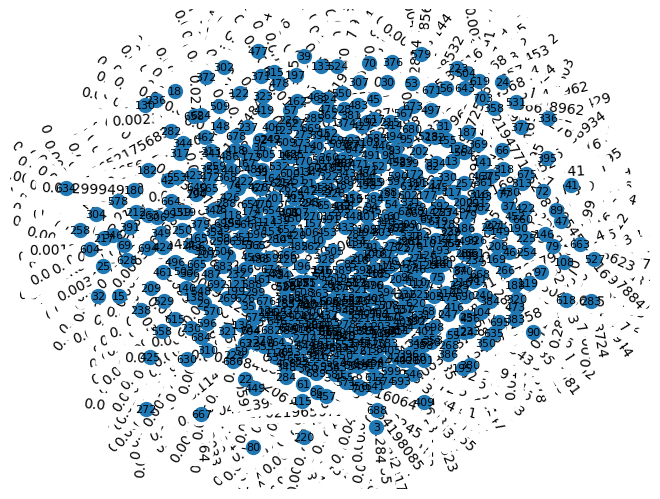

In [32]:
pos = nx.spring_layout(G)  # Atur layout sesuai kebutuhan
labels = {i: i for i in G.nodes()}

nx.draw(G, pos, labels=labels, with_labels=True, node_size=100, font_size=8)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

## Langkah 6: Closeness centrality

In [33]:
closeness_centrality = nx.closeness_centrality(G)


In [35]:
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: Closeness Centrality = {closeness}")

Node 350: Closeness Centrality = 1.0
Node 635: Closeness Centrality = 1.0
Node 695: Closeness Centrality = 1.0
Node 352: Closeness Centrality = 1.0
Node 637: Closeness Centrality = 1.0
Node 697: Closeness Centrality = 1.0
Node 353: Closeness Centrality = 1.0
Node 638: Closeness Centrality = 1.0
Node 698: Closeness Centrality = 1.0
Node 354: Closeness Centrality = 1.0
Node 639: Closeness Centrality = 1.0
Node 699: Closeness Centrality = 1.0
Node 357: Closeness Centrality = 1.0
Node 642: Closeness Centrality = 1.0
Node 702: Closeness Centrality = 1.0
Node 359: Closeness Centrality = 1.0
Node 644: Closeness Centrality = 1.0
Node 704: Closeness Centrality = 1.0
Node 0: Closeness Centrality = 1.0
Node 1: Closeness Centrality = 1.0
Node 2: Closeness Centrality = 1.0
Node 3: Closeness Centrality = 1.0
Node 4: Closeness Centrality = 1.0
Node 5: Closeness Centrality = 1.0
Node 6: Closeness Centrality = 1.0
Node 7: Closeness Centrality = 1.0
Node 8: Closeness Centrality = 1.0
Node 9: Closeness C